## 1-Dimensional Ising Model Monte Carlo Simulation 

### Sahana Bhattacharyya 

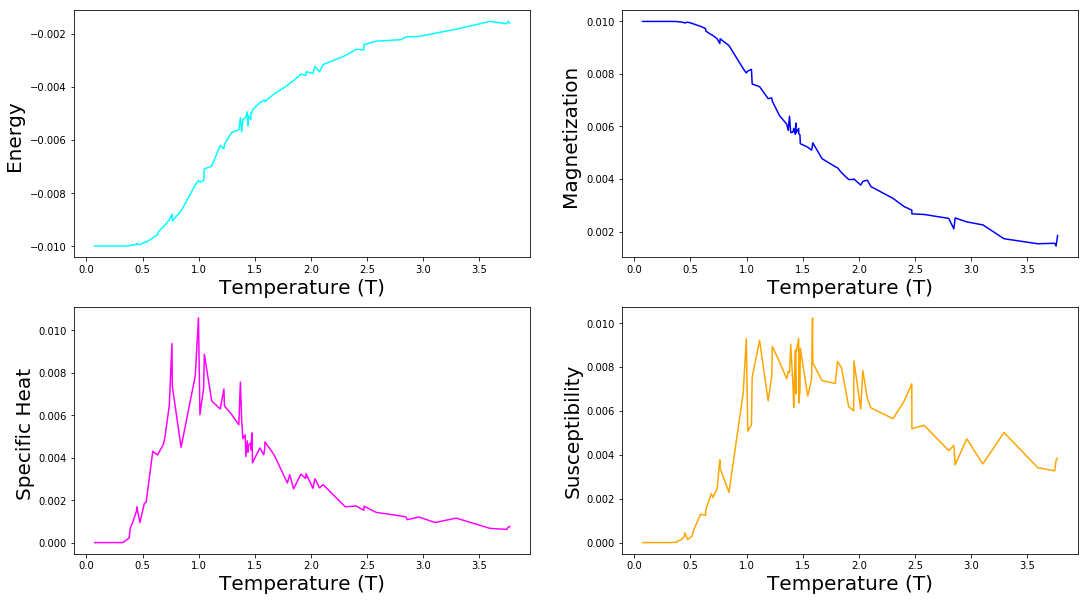

In [8]:
# Initiation of Parametrs
# -------------------------------------------------------------------------

%matplotlib inline
from __future__ import division
import numpy as np
from numpy.random import rand
import matplotlib.pyplot as plt

# Changing these parameters change a different size system
# --------------------------------------------------------------------------

nt  = 100     # number of temperature points
N   = 100     # size of the lattice, N x 1
Sweeps = 100  # number of MC sweeps for equilibration
Steps = 100   # number of MC sweeps for calculation

n1, n2  = 1.0/(Steps*N*N), 1.0/(Steps*Steps*N*N)
tm = 0.5;    T=2*np.random.normal(tm, .64, nt)
T  = T[(T>0) & (T<3.8)];    nt = np.size(T)
T.sort()

Energy       = np.zeros(nt);   Magnetization  = np.zeros(nt)
SpecificHeat = np.zeros(nt);   Susceptibility = np.zeros(nt)

#----------------------------------------------------------------------
#  MAIN PART OF THE CODE
#----------------------------------------------------------------------

def initialstate(N):   
    # Generates a random spin configuration for initial condition
    state = 2*np.random.randint(2, size=(N, 1))-1               # for 1D (Nx1)
    return state

def mcmove(spin, beta):
    # Monte Carlo move using Metropolis algorithm
    for i in range(N):
        H = 1.0                                                 # Adding Magnetic Field
        a = np.random.randint(0, N)                             # Randomly selecting a point in lattice 
        s =  spin[a]
        nn = spin[(a+1)%N] + spin[(a-1)%N]                      # Nearest Neighbors (2 for 1D) 
        weight = s*(nn+H)
        if weight < 0:
            s *= -1                                             # Flip the spin
        elif rand() < np.exp(-weight*beta):
            s *= -1                                             # Flip the spin 
            spin[a] = s
    return spin 

def calcEnergy(spin):
    ## Energy of the 1D ising model for a particular configuration
    energy = 0
    for i in range(len(spin)):
        S = spin[i]
        nn = spin[(i+1)%N] + spin[(i-1)%N] 
        energy += -nn*S          # Each neighbor gives energy 1.0
    return energy/2              # Each per counted twice


def calcMag(spin):
    # Magnetization of a given configuration
    mag = np.sum(spin)
    return mag

for m in range(len(T)):
    E1 = M1 = E2 = M2 = 0
    spin = initialstate(N)
    iT=1.0/T[m]; iT2=iT*iT;
    
    for i in range(Sweeps):         # equilibrate
        mcmove(spin, iT)           # Monte Carlo moves

    for i in range(Steps):
        mcmove(spin, iT)           
        Ene = calcEnergy(spin)     # calculate the energy
        Mag = calcMag(spin)        # calculate the magnetisation

        E1 = E1 + Ene
        M1 = M1 + Mag
        M2 = M2 + Mag*Mag 
        E2 = E2 + Ene*Ene

        Energy[m]         = n1*E1
        Magnetization[m]  = n1*M1
        SpecificHeat[m]   = (n1*E2 - n2*E1*E1)*iT2
        Susceptibility[m] = (n1*M2 - n2*M1*M1)*iT
        
f = plt.figure(figsize=(18, 10)); # plot the calculated values    

sp =  f.add_subplot(2, 2, 1 );
plt.plot(T, Energy, '-', color="cyan");
plt.xlabel("Temperature (T)", fontsize=20);
plt.ylabel("Energy ", fontsize=20);

sp =  f.add_subplot(2, 2, 2 );
plt.plot(T, abs(Magnetization), '-', color="blue");
plt.xlabel("Temperature (T)", fontsize=20);
plt.ylabel("Magnetization ", fontsize=20);

sp =  f.add_subplot(2, 2, 3 );
plt.plot(T, SpecificHeat, '-', color="magenta");
plt.xlabel("Temperature (T)", fontsize=20);
plt.ylabel("Specific Heat ", fontsize=20);

sp =  f.add_subplot(2, 2, 4 );
plt.plot(T, Susceptibility, '-', color="orange");
plt.xlabel("Temperature (T)", fontsize=20);
plt.ylabel("Susceptibility", fontsize=20);